@[toc](目录)

**Pytorch一般有以下几个流程**


### 1.数据读取

### 2.数据处理

### 3.搭建网络

### 4.模型训练

### 5.模型上线


主要包括以上几个阶段，每个阶段又可以细分，后面再说


### 1.数据读取
CIFAR-10 是由 Hinton 的学生 Alex Krizhevsky 和 Ilya Sutskever 整理的一个用于识别普适物体的小型数据集。一共包含 10 个类别的 RGB 彩色图 片：飞机（ arplane ）、汽车（ automobile ）、鸟类（ bird ）、猫（ cat ）、鹿（ deer ）、狗（ dog ）、蛙类（ frog ）、马（ horse ）、船（ ship ）和卡车（ truck ）。图片的尺寸为 32×32 ，数据集中一共有 50000 张训练圄片和 10000 张测试图片。 

与 MNIST 数据集中目比， CIFAR-10 具有以下不同点：

    • CIFAR-10 是 3 通道的彩色 RGB 图像，而 MNIST 是灰度图像。
    • CIFAR-10 的图片尺寸为 32×32， 而 MNIST 的图片尺寸为 28×28，比 MNIST 稍大。
    • 相比于手写字符， CIFAR-10 含有的是现实世界中真实的物体，不仅噪声很大，而且物体的比例、 特征都不尽相同，这为识别带来很大困难。

首先使用`torchvision`加载和归一化我们的训练数据和测试数据。

    a、`torchvision`这个东西，实现了常用的一些深度学习的相关的图像数据的加载功能，比如cifar10、Imagenet、Mnist等等的，保存在`torchvision.datasets`模块中。
    
    b、同时，也封装了一些处理数据的方法。保存在`torchvision.transforms`模块中
    
    c、还封装了一些模型和工具封装在相应模型中,比如`torchvision.models`当中就包含了AlexNet，VGG，ResNet，SqueezeNet等模型。

In [1]:
#首先导入torch，torchvision模块

import torch
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms

**由于torchvision的datasets的输出是[0,1]的PILImage，所以我们先先归一化为[-1,1]的Tensor**

首先定义了一个变换transform，利用的是上面提到的transforms模块中的Compose( )把多个变换组合在一起，可以看到这里面组合了ToTensor和Normalize这两个变换

`transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))`前面的（0.5，0.5，0.5） 是 R G B 三个通道上的均值， 后面(0.5, 0.5, 0.5)是三个通道的标准差，注意通道顺序是 R G B ，用过opencv的同学应该知道openCV读出来的图像是 BRG顺序。这两个tuple数据是用来对RGB 图像做归一化的，如其名称 Normalize 所示这里都取0.5只是一个近似的操作，实际上其均值和方差并不是这么多，但是就这个示例而言 影响可不计。精确值是通过分别计算R,G,B三个通道的数据算出来的。


In [2]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]) 

In [3]:
# datasets.CIFAR10( )也是封装好了的，就在我前面提到的torchvision.datasets块中
trainset = datasets.CIFAR10(root='D:/CIFAR-10', train=True,download=True, transform=transform)

Files already downloaded and verified


 `trainloader`其实是一个比较重要的东西，我们后面就是通过`trainloader`把数据传入网络，当然这里的`trainloader`其实是个变量名，可以随便取，重点是他是由后面的`torch.utils.data.DataLoader()`定义的，这个东西来源于`torch.utils.data`模块

In [4]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128,shuffle=True, num_workers=2)

In [5]:
# 对于测试集的操作和训练集一样，我就不赘述了
testset = torchvision.datasets.CIFAR10(root='D:/CIFAR-10', train=False,download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=128,shuffle=False, num_workers=2)
    # 类别信息也是需要我们给定的
classes = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified


In [6]:
trainset.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [7]:
trainset.class_to_idx

{'airplane': 0,
 'automobile': 1,
 'bird': 2,
 'cat': 3,
 'deer': 4,
 'dog': 5,
 'frog': 6,
 'horse': 7,
 'ship': 8,
 'truck': 9}

### 2. 查看数据（格式，大小，形状）

In [8]:
trainset.data

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [9]:
trainset.data.shape#50000是图片数量，32x32是图片大小，3是通道数量RGB

(50000, 32, 32, 3)

In [10]:
trainset.data[10000][31][31][2]

168

In [11]:
#查看数据类型
print(type(trainset.data))
print(type(trainset))

<class 'numpy.ndarray'>
<class 'torchvision.datasets.cifar.CIFAR10'>


In [12]:
trainset[10000][0][2][31][31]#10000为图片数量，0表示取前面的数据，2表示通道数RGB，32*32表示图片大小

tensor(0.3176)

### 总结：
    
    `trainset.data.shape`是标准的numpy.ndarray类型，其中50000是图片数量，32x32是图片大小，3是通道数量RGB；
    `trainset`是标准的？？类型，其中50000为图片数量，0表示取前面的数据，2表示3通道数RGB，32*32表示图片大小
    
 ### 3. 查看图片

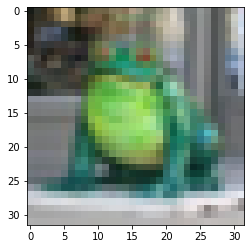

In [13]:
import numpy as np
import matplotlib.pyplot as plt
plt.imshow(trainset.data[19])

### np.ndarray转为torch.Tensor

在深度学习中，原始图像需要转换为深度学习框架自定义的数据格式，在pytorch中，需要转为`torch.Tensor`。
pytorch提供了`torch.Tensor` 与`numpy.ndarray`转换为接口：

方法名|作用
--|--
`torch.from_numpy(xxx)`|`numpy.ndarray`转为torch.Tensor
`tensor1.numpy()`|获取tensor1对象的numpy格式数据

`torch.Tensor` 高维矩阵的表示： N x C x H x W

`numpy.ndarray` 高维矩阵的表示：N x H x W x C

因此在两者转换的时候需要使用`numpy.transpose( )` 方法 。


In [14]:
# numpy image: H x W x C
# torch image: C x H x W
# np.transpose( xxx,  (2, 0, 1))   # 将 H x W x C 转化为 C x H x W
tensor_skimage = torch.from_numpy(np.transpose(trainset.data[19], (2, 0, 1)))
tensor_skimage.size()

torch.Size([3, 32, 32])

### torch.Tensor转numpy.ndarray

In [15]:
# np.transpose( xxx,  (2, 0, 1))   # 将 C x H x W 转化为 H x W x C
img_skimage_2 = np.transpose(trainset[19][0].numpy(), (1,2,0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


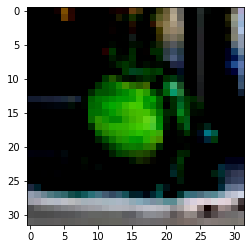

In [16]:
plt.imshow(img_skimage_2)

### 4.自定义网络

从网上查了很多关于神经网络的资料，无疑讨论最多的就是网络结构和参数设置（我觉得我在说废话……），一番整理过后尝试使用这些网络结构和参数。

    1.使用3*3的卷积核
    
    2.使用初始化Xavier
    
    3.使用BN层，减少Dropout使用
    
    4.使用带动量的SGD，或许也可以尝试Adam
    
    5.默认使用ReLU（），或许可以尝试PReLU()
    
    6.batch_size调整为2^n，一般去64,128
    
    7.学习率大小为:0.1->0.01->0.001

In [17]:
import torch
import torch.nn as nn
from torch.autograd import Variable

#定义网络
class Mynet(nn.Module):# nn.Module是所有神经网络的基类，我们自己定义任何神经网络，都要继承nn.Module
    def __init__(self, num_classes=10):
        super(Mynet, self).__init__()
        self.features = nn.Sequential(
            #1
            nn.Conv2d(3,64,kernel_size=3,padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(True),
            #2
            nn.Conv2d(64,64,kernel_size=3,padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(True),
            nn.MaxPool2d(kernel_size=2,stride=2),
            #3
            nn.Conv2d(64,128,kernel_size=3,padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(True),
            #4
            nn.Conv2d(128,128,kernel_size=3,padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(True),
            nn.MaxPool2d(kernel_size=2,stride=2),
            #5
            nn.Conv2d(128,256,kernel_size=3,padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(True),
            #6
            nn.Conv2d(256,256,kernel_size=3,padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(True),
            #7
            nn.Conv2d(256,256,kernel_size=3,padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(True),
            nn.MaxPool2d(kernel_size=2,stride=2),
            #8
            nn.Conv2d(256,512,kernel_size=3,padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(True),
            #9
            nn.Conv2d(512,512,kernel_size=3,padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(True),
            #10
            nn.Conv2d(512,512,kernel_size=3,padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(True),
            nn.MaxPool2d(kernel_size=2,stride=2),
            #11
            nn.Conv2d(512,512,kernel_size=3,padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(True),
            #12
            nn.Conv2d(512,512,kernel_size=3,padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(True),
            #13
            nn.Conv2d(512,512,kernel_size=3,padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(True),
            nn.MaxPool2d(kernel_size=2,stride=2),
            nn.AvgPool2d(kernel_size=1,stride=1),
            )
        self.classifier = nn.Sequential(
            #14
            nn.Linear(512,4096),
            nn.ReLU(True),
            #15
            nn.Linear(4096, 4096),
            nn.ReLU(True),
            #16
            nn.Linear(4096,num_classes),
            )
        #self.classifier = nn.Linear(512, 10)
 
    def forward(self, x):
        out = self.features(x) 
#        print(out.shape)
        out = out.view(out.size(0), -1)
#        print(out.shape)
        out = self.classifier(out)
#        print(out.shape)
        return out

def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv2d') != -1:
        nn.init.xavier_normal_(m.weight.data)
        nn.init.constant_(m.bias.data, 0.0)
    elif classname.find('Linear') != -1:
        nn.init.xavier_normal_(m.weight)
        nn.init.constant_(m.bias, 0.0)
        
net = Mynet().cuda()
net.apply(weights_init) #apply函数会递归地搜索网络内的所有module并把参数表示的函数应用到所有的module上。
print(net)

Mynet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 2

### 5. 定义损失函数和优化器 
    pytorch将深度学习中常用的优化方法全部封装在torch.optim之中，所有的优化方法都是继承基类optim.Optimizier
    
    损失函数是封装在神经网络工具箱nn中的,包含很多损失函数


In [18]:
import torch.optim as optim
#用到了神经网络工具箱 nn 中的交叉熵损失函数
criterion = nn.CrossEntropyLoss() 
# 使用SGD（随机梯度下降）优化，学习率为0.001，动量为0.9
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)  

### 6. 训练

[epoch:1, iter:1] Loss: 2.372 | Acc: 7.812% 
[epoch:1, iter:2] Loss: 2.329 | Acc: 9.375% 
[epoch:1, iter:3] Loss: 2.371 | Acc: 8.594% 
[epoch:1, iter:4] Loss: 2.341 | Acc: 11.328% 
[epoch:1, iter:5] Loss: 2.338 | Acc: 12.344% 
[epoch:1, iter:6] Loss: 2.324 | Acc: 13.542% 
[epoch:1, iter:7] Loss: 2.314 | Acc: 13.839% 
[epoch:1, iter:8] Loss: 2.302 | Acc: 14.453% 
[epoch:1, iter:9] Loss: 2.296 | Acc: 15.538% 
[epoch:1, iter:10] Loss: 2.279 | Acc: 15.781% 
[epoch:1, iter:11] Loss: 2.254 | Acc: 16.619% 
[epoch:1, iter:12] Loss: 2.220 | Acc: 17.708% 
[epoch:1, iter:13] Loss: 2.198 | Acc: 18.149% 
[epoch:1, iter:14] Loss: 2.184 | Acc: 18.917% 
[epoch:1, iter:15] Loss: 2.159 | Acc: 19.635% 
[epoch:1, iter:16] Loss: 2.142 | Acc: 19.873% 
[epoch:1, iter:17] Loss: 2.126 | Acc: 20.358% 
[epoch:1, iter:18] Loss: 2.125 | Acc: 20.747% 
[epoch:1, iter:19] Loss: 2.106 | Acc: 21.834% 
[epoch:1, iter:20] Loss: 2.089 | Acc: 22.344% 
[epoch:1, iter:21] Loss: 2.079 | Acc: 22.693% 
[epoch:1, iter:22] Loss: 

[epoch:1, iter:174] Loss: 1.517 | Acc: 44.064% 
[epoch:1, iter:175] Loss: 1.514 | Acc: 44.138% 
[epoch:1, iter:176] Loss: 1.513 | Acc: 44.207% 
[epoch:1, iter:177] Loss: 1.511 | Acc: 44.275% 
[epoch:1, iter:178] Loss: 1.508 | Acc: 44.386% 
[epoch:1, iter:179] Loss: 1.507 | Acc: 44.435% 
[epoch:1, iter:180] Loss: 1.506 | Acc: 44.457% 
[epoch:1, iter:181] Loss: 1.505 | Acc: 44.510% 
[epoch:1, iter:182] Loss: 1.504 | Acc: 44.561% 
[epoch:1, iter:183] Loss: 1.502 | Acc: 44.634% 
[epoch:1, iter:184] Loss: 1.502 | Acc: 44.684% 
[epoch:1, iter:185] Loss: 1.500 | Acc: 44.713% 
[epoch:1, iter:186] Loss: 1.499 | Acc: 44.800% 
[epoch:1, iter:187] Loss: 1.497 | Acc: 44.861% 
[epoch:1, iter:188] Loss: 1.496 | Acc: 44.943% 
[epoch:1, iter:189] Loss: 1.495 | Acc: 44.986% 
[epoch:1, iter:190] Loss: 1.493 | Acc: 45.058% 
[epoch:1, iter:191] Loss: 1.493 | Acc: 45.079% 
[epoch:1, iter:192] Loss: 1.492 | Acc: 45.125% 
[epoch:1, iter:193] Loss: 1.490 | Acc: 45.147% 
[epoch:1, iter:194] Loss: 1.489 | Acc: 4

[epoch:1, iter:345] Loss: 1.312 | Acc: 52.203% 
[epoch:1, iter:346] Loss: 1.311 | Acc: 52.281% 
[epoch:1, iter:347] Loss: 1.310 | Acc: 52.330% 
[epoch:1, iter:348] Loss: 1.309 | Acc: 52.373% 
[epoch:1, iter:349] Loss: 1.308 | Acc: 52.411% 
[epoch:1, iter:350] Loss: 1.306 | Acc: 52.462% 
[epoch:1, iter:351] Loss: 1.305 | Acc: 52.500% 
[epoch:1, iter:352] Loss: 1.304 | Acc: 52.555% 
[epoch:1, iter:353] Loss: 1.302 | Acc: 52.614% 
[epoch:1, iter:354] Loss: 1.302 | Acc: 52.644% 
[epoch:1, iter:355] Loss: 1.301 | Acc: 52.685% 
[epoch:1, iter:356] Loss: 1.300 | Acc: 52.717% 
[epoch:1, iter:357] Loss: 1.299 | Acc: 52.757% 
[epoch:1, iter:358] Loss: 1.297 | Acc: 52.811% 
[epoch:1, iter:359] Loss: 1.297 | Acc: 52.836% 
[epoch:1, iter:360] Loss: 1.295 | Acc: 52.875% 
[epoch:1, iter:361] Loss: 1.295 | Acc: 52.904% 
[epoch:1, iter:362] Loss: 1.294 | Acc: 52.931% 
[epoch:1, iter:363] Loss: 1.293 | Acc: 52.983% 
[epoch:1, iter:364] Loss: 1.292 | Acc: 53.003% 
[epoch:1, iter:365] Loss: 1.291 | Acc: 5

[epoch:2, iter:516] Loss: 0.832 | Acc: 70.500% 
[epoch:2, iter:517] Loss: 0.831 | Acc: 70.530% 
[epoch:2, iter:518] Loss: 0.832 | Acc: 70.528% 
[epoch:2, iter:519] Loss: 0.831 | Acc: 70.563% 
[epoch:2, iter:520] Loss: 0.831 | Acc: 70.543% 
[epoch:2, iter:521] Loss: 0.829 | Acc: 70.607% 
[epoch:2, iter:522] Loss: 0.829 | Acc: 70.623% 
[epoch:2, iter:523] Loss: 0.829 | Acc: 70.620% 
[epoch:2, iter:524] Loss: 0.828 | Acc: 70.618% 
[epoch:2, iter:525] Loss: 0.828 | Acc: 70.651% 
[epoch:2, iter:526] Loss: 0.828 | Acc: 70.654% 
[epoch:2, iter:527] Loss: 0.828 | Acc: 70.623% 
[epoch:2, iter:528] Loss: 0.827 | Acc: 70.655% 
[epoch:2, iter:529] Loss: 0.828 | Acc: 70.675% 
[epoch:2, iter:530] Loss: 0.827 | Acc: 70.700% 
[epoch:2, iter:531] Loss: 0.827 | Acc: 70.709% 
[epoch:2, iter:532] Loss: 0.828 | Acc: 70.700% 
[epoch:2, iter:533] Loss: 0.828 | Acc: 70.731% 
[epoch:2, iter:534] Loss: 0.827 | Acc: 70.733% 
[epoch:2, iter:535] Loss: 0.826 | Acc: 70.785% 
[epoch:2, iter:536] Loss: 0.826 | Acc: 7

[epoch:2, iter:687] Loss: 0.789 | Acc: 72.448% 
[epoch:2, iter:688] Loss: 0.788 | Acc: 72.475% 
[epoch:2, iter:689] Loss: 0.788 | Acc: 72.483% 
[epoch:2, iter:690] Loss: 0.787 | Acc: 72.507% 
[epoch:2, iter:691] Loss: 0.787 | Acc: 72.526% 
[epoch:2, iter:692] Loss: 0.786 | Acc: 72.542% 
[epoch:2, iter:693] Loss: 0.786 | Acc: 72.550% 
[epoch:2, iter:694] Loss: 0.785 | Acc: 72.579% 
[epoch:2, iter:695] Loss: 0.785 | Acc: 72.561% 
[epoch:2, iter:696] Loss: 0.784 | Acc: 72.597% 
[epoch:2, iter:697] Loss: 0.784 | Acc: 72.600% 
[epoch:2, iter:698] Loss: 0.784 | Acc: 72.600% 
[epoch:2, iter:699] Loss: 0.784 | Acc: 72.603% 
[epoch:2, iter:700] Loss: 0.784 | Acc: 72.613% 
[epoch:2, iter:701] Loss: 0.784 | Acc: 72.616% 
[epoch:2, iter:702] Loss: 0.784 | Acc: 72.614% 
[epoch:2, iter:703] Loss: 0.784 | Acc: 72.616% 
[epoch:2, iter:704] Loss: 0.784 | Acc: 72.599% 
[epoch:2, iter:705] Loss: 0.784 | Acc: 72.604% 
[epoch:2, iter:706] Loss: 0.784 | Acc: 72.599% 
[epoch:2, iter:707] Loss: 0.784 | Acc: 7

[epoch:3, iter:858] Loss: 0.574 | Acc: 80.613% 
[epoch:3, iter:859] Loss: 0.573 | Acc: 80.621% 
[epoch:3, iter:860] Loss: 0.573 | Acc: 80.619% 
[epoch:3, iter:861] Loss: 0.575 | Acc: 80.558% 
[epoch:3, iter:862] Loss: 0.577 | Acc: 80.508% 
[epoch:3, iter:863] Loss: 0.576 | Acc: 80.517% 
[epoch:3, iter:864] Loss: 0.575 | Acc: 80.535% 
[epoch:3, iter:865] Loss: 0.575 | Acc: 80.478% 
[epoch:3, iter:866] Loss: 0.576 | Acc: 80.478% 
[epoch:3, iter:867] Loss: 0.577 | Acc: 80.414% 
[epoch:3, iter:868] Loss: 0.575 | Acc: 80.469% 
[epoch:3, iter:869] Loss: 0.575 | Acc: 80.487% 
[epoch:3, iter:870] Loss: 0.575 | Acc: 80.469% 
[epoch:3, iter:871] Loss: 0.575 | Acc: 80.495% 
[epoch:3, iter:872] Loss: 0.575 | Acc: 80.495% 
[epoch:3, iter:873] Loss: 0.575 | Acc: 80.409% 
[epoch:3, iter:874] Loss: 0.576 | Acc: 80.350% 
[epoch:3, iter:875] Loss: 0.577 | Acc: 80.334% 
[epoch:3, iter:876] Loss: 0.576 | Acc: 80.344% 
[epoch:3, iter:877] Loss: 0.577 | Acc: 80.288% 
[epoch:3, iter:878] Loss: 0.577 | Acc: 8

[epoch:3, iter:1029] Loss: 0.574 | Acc: 80.111% 
[epoch:3, iter:1030] Loss: 0.575 | Acc: 80.100% 
[epoch:3, iter:1031] Loss: 0.574 | Acc: 80.127% 
[epoch:3, iter:1032] Loss: 0.574 | Acc: 80.109% 
[epoch:3, iter:1033] Loss: 0.575 | Acc: 80.083% 
[epoch:3, iter:1034] Loss: 0.575 | Acc: 80.081% 
[epoch:3, iter:1035] Loss: 0.576 | Acc: 80.067% 
[epoch:3, iter:1036] Loss: 0.576 | Acc: 80.044% 
[epoch:3, iter:1037] Loss: 0.576 | Acc: 80.064% 
[epoch:3, iter:1038] Loss: 0.577 | Acc: 80.042% 
[epoch:3, iter:1039] Loss: 0.576 | Acc: 80.028% 
[epoch:3, iter:1040] Loss: 0.576 | Acc: 80.033% 
[epoch:3, iter:1041] Loss: 0.576 | Acc: 80.022% 
[epoch:3, iter:1042] Loss: 0.576 | Acc: 80.009% 
[epoch:3, iter:1043] Loss: 0.576 | Acc: 80.020% 
[epoch:3, iter:1044] Loss: 0.576 | Acc: 80.018% 
[epoch:3, iter:1045] Loss: 0.576 | Acc: 80.014% 
[epoch:3, iter:1046] Loss: 0.576 | Acc: 80.025% 
[epoch:3, iter:1047] Loss: 0.576 | Acc: 80.009% 
[epoch:3, iter:1048] Loss: 0.576 | Acc: 80.011% 
[epoch:3, iter:1049]

[epoch:4, iter:1197] Loss: 0.414 | Acc: 85.254% 
[epoch:4, iter:1198] Loss: 0.420 | Acc: 85.031% 
[epoch:4, iter:1199] Loss: 0.416 | Acc: 85.216% 
[epoch:4, iter:1200] Loss: 0.409 | Acc: 85.503% 
[epoch:4, iter:1201] Loss: 0.410 | Acc: 85.658% 
[epoch:4, iter:1202] Loss: 0.410 | Acc: 85.722% 
[epoch:4, iter:1203] Loss: 0.412 | Acc: 85.625% 
[epoch:4, iter:1204] Loss: 0.410 | Acc: 85.736% 
[epoch:4, iter:1205] Loss: 0.412 | Acc: 85.693% 
[epoch:4, iter:1206] Loss: 0.413 | Acc: 85.677% 
[epoch:4, iter:1207] Loss: 0.411 | Acc: 85.823% 
[epoch:4, iter:1208] Loss: 0.412 | Acc: 85.781% 
[epoch:4, iter:1209] Loss: 0.413 | Acc: 85.807% 
[epoch:4, iter:1210] Loss: 0.418 | Acc: 85.663% 
[epoch:4, iter:1211] Loss: 0.416 | Acc: 85.691% 
[epoch:4, iter:1212] Loss: 0.415 | Acc: 85.697% 
[epoch:4, iter:1213] Loss: 0.416 | Acc: 85.684% 
[epoch:4, iter:1214] Loss: 0.418 | Acc: 85.595% 
[epoch:4, iter:1215] Loss: 0.419 | Acc: 85.584% 
[epoch:4, iter:1216] Loss: 0.416 | Acc: 85.665% 
[epoch:4, iter:1217]

[epoch:4, iter:1365] Loss: 0.427 | Acc: 85.266% 
[epoch:4, iter:1366] Loss: 0.426 | Acc: 85.298% 
[epoch:4, iter:1367] Loss: 0.426 | Acc: 85.297% 
[epoch:4, iter:1368] Loss: 0.426 | Acc: 85.312% 
[epoch:4, iter:1369] Loss: 0.426 | Acc: 85.308% 
[epoch:4, iter:1370] Loss: 0.426 | Acc: 85.307% 
[epoch:4, iter:1371] Loss: 0.427 | Acc: 85.275% 
[epoch:4, iter:1372] Loss: 0.428 | Acc: 85.258% 
[epoch:4, iter:1373] Loss: 0.428 | Acc: 85.246% 
[epoch:4, iter:1374] Loss: 0.428 | Acc: 85.265% 
[epoch:4, iter:1375] Loss: 0.428 | Acc: 85.268% 
[epoch:4, iter:1376] Loss: 0.428 | Acc: 85.256% 
[epoch:4, iter:1377] Loss: 0.427 | Acc: 85.267% 
[epoch:4, iter:1378] Loss: 0.427 | Acc: 85.286% 
[epoch:4, iter:1379] Loss: 0.427 | Acc: 85.270% 
[epoch:4, iter:1380] Loss: 0.428 | Acc: 85.262% 
[epoch:4, iter:1381] Loss: 0.428 | Acc: 85.243% 
[epoch:4, iter:1382] Loss: 0.428 | Acc: 85.253% 
[epoch:4, iter:1383] Loss: 0.429 | Acc: 85.234% 
[epoch:4, iter:1384] Loss: 0.428 | Acc: 85.253% 
[epoch:4, iter:1385]

[epoch:4, iter:1533] Loss: 0.432 | Acc: 85.119% 
[epoch:4, iter:1534] Loss: 0.432 | Acc: 85.115% 
[epoch:4, iter:1535] Loss: 0.432 | Acc: 85.107% 
[epoch:4, iter:1536] Loss: 0.432 | Acc: 85.100% 
[epoch:4, iter:1537] Loss: 0.433 | Acc: 85.088% 
[epoch:4, iter:1538] Loss: 0.433 | Acc: 85.086% 
[epoch:4, iter:1539] Loss: 0.433 | Acc: 85.088% 
[epoch:4, iter:1540] Loss: 0.433 | Acc: 85.086% 
[epoch:4, iter:1541] Loss: 0.433 | Acc: 85.084% 
[epoch:4, iter:1542] Loss: 0.433 | Acc: 85.086% 
[epoch:4, iter:1543] Loss: 0.433 | Acc: 85.082% 
[epoch:4, iter:1544] Loss: 0.433 | Acc: 85.070% 
[epoch:4, iter:1545] Loss: 0.433 | Acc: 85.068% 
[epoch:4, iter:1546] Loss: 0.433 | Acc: 85.079% 
[epoch:4, iter:1547] Loss: 0.433 | Acc: 85.060% 
[epoch:4, iter:1548] Loss: 0.433 | Acc: 85.050% 
[epoch:4, iter:1549] Loss: 0.433 | Acc: 85.046% 
[epoch:4, iter:1550] Loss: 0.433 | Acc: 85.061% 
[epoch:4, iter:1551] Loss: 0.433 | Acc: 85.061% 
[epoch:4, iter:1552] Loss: 0.434 | Acc: 85.051% 
[epoch:4, iter:1553]

[epoch:5, iter:1701] Loss: 0.303 | Acc: 89.701% 
[epoch:5, iter:1702] Loss: 0.303 | Acc: 89.714% 
[epoch:5, iter:1703] Loss: 0.303 | Acc: 89.714% 
[epoch:5, iter:1704] Loss: 0.303 | Acc: 89.727% 
[epoch:5, iter:1705] Loss: 0.304 | Acc: 89.722% 
[epoch:5, iter:1706] Loss: 0.304 | Acc: 89.717% 
[epoch:5, iter:1707] Loss: 0.304 | Acc: 89.729% 
[epoch:5, iter:1708] Loss: 0.304 | Acc: 89.735% 
[epoch:5, iter:1709] Loss: 0.303 | Acc: 89.736% 
[epoch:5, iter:1710] Loss: 0.303 | Acc: 89.737% 
[epoch:5, iter:1711] Loss: 0.303 | Acc: 89.743% 
[epoch:5, iter:1712] Loss: 0.303 | Acc: 89.738% 
[epoch:5, iter:1713] Loss: 0.303 | Acc: 89.755% 
[epoch:5, iter:1714] Loss: 0.303 | Acc: 89.734% 
[epoch:5, iter:1715] Loss: 0.303 | Acc: 89.730% 
[epoch:5, iter:1716] Loss: 0.303 | Acc: 89.715% 
[epoch:5, iter:1717] Loss: 0.304 | Acc: 89.691% 
[epoch:5, iter:1718] Loss: 0.304 | Acc: 89.707% 
[epoch:5, iter:1719] Loss: 0.304 | Acc: 89.688% 
[epoch:5, iter:1720] Loss: 0.304 | Acc: 89.688% 
[epoch:5, iter:1721]

[epoch:5, iter:1869] Loss: 0.320 | Acc: 89.121% 
[epoch:5, iter:1870] Loss: 0.320 | Acc: 89.114% 
[epoch:5, iter:1871] Loss: 0.320 | Acc: 89.118% 
[epoch:5, iter:1872] Loss: 0.320 | Acc: 89.106% 
[epoch:5, iter:1873] Loss: 0.320 | Acc: 89.100% 
[epoch:5, iter:1874] Loss: 0.320 | Acc: 89.113% 
[epoch:5, iter:1875] Loss: 0.320 | Acc: 89.105% 
[epoch:5, iter:1876] Loss: 0.320 | Acc: 89.113% 
[epoch:5, iter:1877] Loss: 0.320 | Acc: 89.102% 
[epoch:5, iter:1878] Loss: 0.321 | Acc: 89.090% 
[epoch:5, iter:1879] Loss: 0.321 | Acc: 89.090% 
[epoch:5, iter:1880] Loss: 0.321 | Acc: 89.095% 
[epoch:5, iter:1881] Loss: 0.321 | Acc: 89.095% 
[epoch:5, iter:1882] Loss: 0.321 | Acc: 89.082% 
[epoch:5, iter:1883] Loss: 0.321 | Acc: 89.082% 
[epoch:5, iter:1884] Loss: 0.321 | Acc: 89.075% 
[epoch:5, iter:1885] Loss: 0.321 | Acc: 89.072% 
[epoch:5, iter:1886] Loss: 0.322 | Acc: 89.062% 
[epoch:5, iter:1887] Loss: 0.322 | Acc: 89.050% 
[epoch:5, iter:1888] Loss: 0.322 | Acc: 89.055% 
[epoch:5, iter:1889]

[epoch:6, iter:2037] Loss: 0.212 | Acc: 92.407% 
[epoch:6, iter:2038] Loss: 0.212 | Acc: 92.395% 
[epoch:6, iter:2039] Loss: 0.212 | Acc: 92.383% 
[epoch:6, iter:2040] Loss: 0.213 | Acc: 92.362% 
[epoch:6, iter:2041] Loss: 0.213 | Acc: 92.369% 
[epoch:6, iter:2042] Loss: 0.212 | Acc: 92.376% 
[epoch:6, iter:2043] Loss: 0.212 | Acc: 92.383% 
[epoch:6, iter:2044] Loss: 0.213 | Acc: 92.372% 
[epoch:6, iter:2045] Loss: 0.213 | Acc: 92.378% 
[epoch:6, iter:2046] Loss: 0.213 | Acc: 92.376% 
[epoch:6, iter:2047] Loss: 0.213 | Acc: 92.374% 
[epoch:6, iter:2048] Loss: 0.214 | Acc: 92.339% 
[epoch:6, iter:2049] Loss: 0.212 | Acc: 92.395% 
[epoch:6, iter:2050] Loss: 0.214 | Acc: 92.336% 
[epoch:6, iter:2051] Loss: 0.215 | Acc: 92.293% 
[epoch:6, iter:2052] Loss: 0.216 | Acc: 92.276% 
[epoch:6, iter:2053] Loss: 0.216 | Acc: 92.251% 
[epoch:6, iter:2054] Loss: 0.217 | Acc: 92.219% 
[epoch:6, iter:2055] Loss: 0.217 | Acc: 92.227% 
[epoch:6, iter:2056] Loss: 0.219 | Acc: 92.133% 
[epoch:6, iter:2057]

[epoch:6, iter:2205] Loss: 0.244 | Acc: 91.225% 
[epoch:6, iter:2206] Loss: 0.243 | Acc: 91.244% 
[epoch:6, iter:2207] Loss: 0.243 | Acc: 91.251% 
[epoch:6, iter:2208] Loss: 0.243 | Acc: 91.246% 
[epoch:6, iter:2209] Loss: 0.244 | Acc: 91.237% 
[epoch:6, iter:2210] Loss: 0.244 | Acc: 91.225% 
[epoch:6, iter:2211] Loss: 0.244 | Acc: 91.202% 
[epoch:6, iter:2212] Loss: 0.244 | Acc: 91.203% 
[epoch:6, iter:2213] Loss: 0.244 | Acc: 91.188% 
[epoch:6, iter:2214] Loss: 0.245 | Acc: 91.189% 
[epoch:6, iter:2215] Loss: 0.245 | Acc: 91.190% 
[epoch:6, iter:2216] Loss: 0.245 | Acc: 91.173% 
[epoch:6, iter:2217] Loss: 0.244 | Acc: 91.186% 
[epoch:6, iter:2218] Loss: 0.244 | Acc: 91.192% 
[epoch:6, iter:2219] Loss: 0.244 | Acc: 91.208% 
[epoch:6, iter:2220] Loss: 0.244 | Acc: 91.218% 
[epoch:6, iter:2221] Loss: 0.244 | Acc: 91.209% 
[epoch:6, iter:2222] Loss: 0.244 | Acc: 91.213% 
[epoch:6, iter:2223] Loss: 0.244 | Acc: 91.217% 
[epoch:6, iter:2224] Loss: 0.244 | Acc: 91.209% 
[epoch:6, iter:2225]

[epoch:7, iter:2373] Loss: 0.160 | Acc: 94.850% 
[epoch:7, iter:2374] Loss: 0.159 | Acc: 94.866% 
[epoch:7, iter:2375] Loss: 0.159 | Acc: 94.828% 
[epoch:7, iter:2376] Loss: 0.161 | Acc: 94.740% 
[epoch:7, iter:2377] Loss: 0.162 | Acc: 94.733% 
[epoch:7, iter:2378] Loss: 0.161 | Acc: 94.800% 
[epoch:7, iter:2379] Loss: 0.161 | Acc: 94.839% 
[epoch:7, iter:2380] Loss: 0.162 | Acc: 94.784% 
[epoch:7, iter:2381] Loss: 0.161 | Acc: 94.777% 
[epoch:7, iter:2382] Loss: 0.160 | Acc: 94.770% 
[epoch:7, iter:2383] Loss: 0.158 | Acc: 94.827% 
[epoch:7, iter:2384] Loss: 0.158 | Acc: 94.840% 
[epoch:7, iter:2385] Loss: 0.158 | Acc: 94.832% 
[epoch:7, iter:2386] Loss: 0.159 | Acc: 94.785% 
[epoch:7, iter:2387] Loss: 0.160 | Acc: 94.665% 
[epoch:7, iter:2388] Loss: 0.159 | Acc: 94.717% 
[epoch:7, iter:2389] Loss: 0.159 | Acc: 94.658% 
[epoch:7, iter:2390] Loss: 0.159 | Acc: 94.638% 
[epoch:7, iter:2391] Loss: 0.160 | Acc: 94.566% 
[epoch:7, iter:2392] Loss: 0.159 | Acc: 94.565% 
[epoch:7, iter:2393]

[epoch:7, iter:2541] Loss: 0.166 | Acc: 94.307% 
[epoch:7, iter:2542] Loss: 0.166 | Acc: 94.304% 
[epoch:7, iter:2543] Loss: 0.166 | Acc: 94.277% 
[epoch:7, iter:2544] Loss: 0.166 | Acc: 94.283% 
[epoch:7, iter:2545] Loss: 0.167 | Acc: 94.280% 
[epoch:7, iter:2546] Loss: 0.167 | Acc: 94.270% 
[epoch:7, iter:2547] Loss: 0.167 | Acc: 94.275% 
[epoch:7, iter:2548] Loss: 0.167 | Acc: 94.261% 
[epoch:7, iter:2549] Loss: 0.167 | Acc: 94.254% 
[epoch:7, iter:2550] Loss: 0.167 | Acc: 94.252% 
[epoch:7, iter:2551] Loss: 0.167 | Acc: 94.242% 
[epoch:7, iter:2552] Loss: 0.168 | Acc: 94.209% 
[epoch:7, iter:2553] Loss: 0.168 | Acc: 94.203% 
[epoch:7, iter:2554] Loss: 0.168 | Acc: 94.201% 
[epoch:7, iter:2555] Loss: 0.168 | Acc: 94.199% 
[epoch:7, iter:2556] Loss: 0.168 | Acc: 94.211% 
[epoch:7, iter:2557] Loss: 0.168 | Acc: 94.224% 
[epoch:7, iter:2558] Loss: 0.169 | Acc: 94.207% 
[epoch:7, iter:2559] Loss: 0.168 | Acc: 94.205% 
[epoch:7, iter:2560] Loss: 0.168 | Acc: 94.214% 
[epoch:7, iter:2561]

[epoch:7, iter:2709] Loss: 0.180 | Acc: 93.782% 
[epoch:7, iter:2710] Loss: 0.181 | Acc: 93.778% 
[epoch:7, iter:2711] Loss: 0.181 | Acc: 93.774% 
[epoch:7, iter:2712] Loss: 0.181 | Acc: 93.769% 
[epoch:7, iter:2713] Loss: 0.181 | Acc: 93.763% 
[epoch:7, iter:2714] Loss: 0.181 | Acc: 93.758% 
[epoch:7, iter:2715] Loss: 0.182 | Acc: 93.729% 
[epoch:7, iter:2716] Loss: 0.182 | Acc: 93.720% 
[epoch:7, iter:2717] Loss: 0.182 | Acc: 93.727% 
[epoch:7, iter:2718] Loss: 0.182 | Acc: 93.725% 
[epoch:7, iter:2719] Loss: 0.182 | Acc: 93.727% 
[epoch:7, iter:2720] Loss: 0.182 | Acc: 93.710% 
[epoch:7, iter:2721] Loss: 0.183 | Acc: 93.706% 
[epoch:7, iter:2722] Loss: 0.183 | Acc: 93.702% 
[epoch:7, iter:2723] Loss: 0.183 | Acc: 93.702% 
[epoch:7, iter:2724] Loss: 0.183 | Acc: 93.694% 
[epoch:7, iter:2725] Loss: 0.183 | Acc: 93.696% 
[epoch:7, iter:2726] Loss: 0.182 | Acc: 93.703% 
[epoch:7, iter:2727] Loss: 0.183 | Acc: 93.701% 
[epoch:7, iter:2728] Loss: 0.183 | Acc: 93.697% 
[epoch:7, iter:2729]

[epoch:8, iter:2877] Loss: 0.128 | Acc: 95.491% 
[epoch:8, iter:2878] Loss: 0.127 | Acc: 95.506% 
[epoch:8, iter:2879] Loss: 0.128 | Acc: 95.500% 
[epoch:8, iter:2880] Loss: 0.128 | Acc: 95.482% 
[epoch:8, iter:2881] Loss: 0.129 | Acc: 95.464% 
[epoch:8, iter:2882] Loss: 0.129 | Acc: 95.474% 
[epoch:8, iter:2883] Loss: 0.129 | Acc: 95.452% 
[epoch:8, iter:2884] Loss: 0.129 | Acc: 95.445% 
[epoch:8, iter:2885] Loss: 0.130 | Acc: 95.423% 
[epoch:8, iter:2886] Loss: 0.131 | Acc: 95.407% 
[epoch:8, iter:2887] Loss: 0.131 | Acc: 95.401% 
[epoch:8, iter:2888] Loss: 0.131 | Acc: 95.406% 
[epoch:8, iter:2889] Loss: 0.131 | Acc: 95.390% 
[epoch:8, iter:2890] Loss: 0.131 | Acc: 95.399% 
[epoch:8, iter:2891] Loss: 0.131 | Acc: 95.389% 
[epoch:8, iter:2892] Loss: 0.132 | Acc: 95.368% 
[epoch:8, iter:2893] Loss: 0.132 | Acc: 95.378% 
[epoch:8, iter:2894] Loss: 0.132 | Acc: 95.372% 
[epoch:8, iter:2895] Loss: 0.132 | Acc: 95.367% 
[epoch:8, iter:2896] Loss: 0.132 | Acc: 95.367% 
[epoch:8, iter:2897]

[epoch:8, iter:3045] Loss: 0.145 | Acc: 94.975% 
[epoch:8, iter:3046] Loss: 0.145 | Acc: 94.979% 
[epoch:8, iter:3047] Loss: 0.145 | Acc: 94.975% 
[epoch:8, iter:3048] Loss: 0.145 | Acc: 94.971% 
[epoch:8, iter:3049] Loss: 0.145 | Acc: 94.972% 
[epoch:8, iter:3050] Loss: 0.145 | Acc: 94.968% 
[epoch:8, iter:3051] Loss: 0.146 | Acc: 94.959% 
[epoch:8, iter:3052] Loss: 0.145 | Acc: 94.960% 
[epoch:8, iter:3053] Loss: 0.146 | Acc: 94.949% 
[epoch:8, iter:3054] Loss: 0.146 | Acc: 94.948% 
[epoch:8, iter:3055] Loss: 0.146 | Acc: 94.942% 
[epoch:8, iter:3056] Loss: 0.146 | Acc: 94.943% 
[epoch:8, iter:3057] Loss: 0.147 | Acc: 94.937% 
[epoch:8, iter:3058] Loss: 0.147 | Acc: 94.940% 
[epoch:8, iter:3059] Loss: 0.146 | Acc: 94.951% 
[epoch:8, iter:3060] Loss: 0.147 | Acc: 94.947% 
[epoch:8, iter:3061] Loss: 0.147 | Acc: 94.944% 
[epoch:8, iter:3062] Loss: 0.147 | Acc: 94.942% 
[epoch:8, iter:3063] Loss: 0.147 | Acc: 94.936% 
[epoch:8, iter:3064] Loss: 0.147 | Acc: 94.935% 
[epoch:8, iter:3065]

[epoch:9, iter:3213] Loss: 0.088 | Acc: 96.893% 
[epoch:9, iter:3214] Loss: 0.088 | Acc: 96.875% 
[epoch:9, iter:3215] Loss: 0.090 | Acc: 96.839% 
[epoch:9, iter:3216] Loss: 0.089 | Acc: 96.857% 
[epoch:9, iter:3217] Loss: 0.089 | Acc: 96.857% 
[epoch:9, iter:3218] Loss: 0.089 | Acc: 96.866% 
[epoch:9, iter:3219] Loss: 0.088 | Acc: 96.884% 
[epoch:9, iter:3220] Loss: 0.088 | Acc: 96.892% 
[epoch:9, iter:3221] Loss: 0.088 | Acc: 96.892% 
[epoch:9, iter:3222] Loss: 0.088 | Acc: 96.892% 
[epoch:9, iter:3223] Loss: 0.088 | Acc: 96.875% 
[epoch:9, iter:3224] Loss: 0.089 | Acc: 96.851% 
[epoch:9, iter:3225] Loss: 0.089 | Acc: 96.835% 
[epoch:9, iter:3226] Loss: 0.089 | Acc: 96.827% 
[epoch:9, iter:3227] Loss: 0.089 | Acc: 96.836% 
[epoch:9, iter:3228] Loss: 0.090 | Acc: 96.828% 
[epoch:9, iter:3229] Loss: 0.090 | Acc: 96.836% 
[epoch:9, iter:3230] Loss: 0.089 | Acc: 96.821% 
[epoch:9, iter:3231] Loss: 0.090 | Acc: 96.784% 
[epoch:9, iter:3232] Loss: 0.090 | Acc: 96.777% 
[epoch:9, iter:3233]

[epoch:9, iter:3381] Loss: 0.106 | Acc: 96.332% 
[epoch:9, iter:3382] Loss: 0.106 | Acc: 96.343% 
[epoch:9, iter:3383] Loss: 0.106 | Acc: 96.345% 
[epoch:9, iter:3384] Loss: 0.107 | Acc: 96.344% 
[epoch:9, iter:3385] Loss: 0.106 | Acc: 96.355% 
[epoch:9, iter:3386] Loss: 0.106 | Acc: 96.348% 
[epoch:9, iter:3387] Loss: 0.106 | Acc: 96.350% 
[epoch:9, iter:3388] Loss: 0.107 | Acc: 96.352% 
[epoch:9, iter:3389] Loss: 0.107 | Acc: 96.345% 
[epoch:9, iter:3390] Loss: 0.107 | Acc: 96.350% 
[epoch:9, iter:3391] Loss: 0.106 | Acc: 96.346% 
[epoch:9, iter:3392] Loss: 0.106 | Acc: 96.357% 
[epoch:9, iter:3393] Loss: 0.106 | Acc: 96.356% 
[epoch:9, iter:3394] Loss: 0.106 | Acc: 96.361% 
[epoch:9, iter:3395] Loss: 0.106 | Acc: 96.372% 
[epoch:9, iter:3396] Loss: 0.106 | Acc: 96.377% 
[epoch:9, iter:3397] Loss: 0.106 | Acc: 96.367% 
[epoch:9, iter:3398] Loss: 0.106 | Acc: 96.366% 
[epoch:9, iter:3399] Loss: 0.106 | Acc: 96.350% 
[epoch:9, iter:3400] Loss: 0.106 | Acc: 96.347% 
[epoch:9, iter:3401]

[epoch:10, iter:3548] Loss: 0.073 | Acc: 97.522% 
[epoch:10, iter:3549] Loss: 0.074 | Acc: 97.448% 
[epoch:10, iter:3550] Loss: 0.072 | Acc: 97.505% 
[epoch:10, iter:3551] Loss: 0.071 | Acc: 97.559% 
[epoch:10, iter:3552] Loss: 0.072 | Acc: 97.514% 
[epoch:10, iter:3553] Loss: 0.071 | Acc: 97.541% 
[epoch:10, iter:3554] Loss: 0.073 | Acc: 97.522% 
[epoch:10, iter:3555] Loss: 0.074 | Acc: 97.504% 
[epoch:10, iter:3556] Loss: 0.075 | Acc: 97.466% 
[epoch:10, iter:3557] Loss: 0.074 | Acc: 97.512% 
[epoch:10, iter:3558] Loss: 0.073 | Acc: 97.516% 
[epoch:10, iter:3559] Loss: 0.073 | Acc: 97.539% 
[epoch:10, iter:3560] Loss: 0.072 | Acc: 97.542% 
[epoch:10, iter:3561] Loss: 0.074 | Acc: 97.489% 
[epoch:10, iter:3562] Loss: 0.074 | Acc: 97.475% 
[epoch:10, iter:3563] Loss: 0.074 | Acc: 97.479% 
[epoch:10, iter:3564] Loss: 0.074 | Acc: 97.483% 
[epoch:10, iter:3565] Loss: 0.073 | Acc: 97.503% 
[epoch:10, iter:3566] Loss: 0.073 | Acc: 97.490% 
[epoch:10, iter:3567] Loss: 0.073 | Acc: 97.526% 


[epoch:10, iter:3712] Loss: 0.076 | Acc: 97.369% 
[epoch:10, iter:3713] Loss: 0.076 | Acc: 97.370% 
[epoch:10, iter:3714] Loss: 0.076 | Acc: 97.364% 
[epoch:10, iter:3715] Loss: 0.077 | Acc: 97.357% 
[epoch:10, iter:3716] Loss: 0.077 | Acc: 97.351% 
[epoch:10, iter:3717] Loss: 0.077 | Acc: 97.341% 
[epoch:10, iter:3718] Loss: 0.077 | Acc: 97.334% 
[epoch:10, iter:3719] Loss: 0.077 | Acc: 97.312% 
[epoch:10, iter:3720] Loss: 0.077 | Acc: 97.314% 
[epoch:10, iter:3721] Loss: 0.077 | Acc: 97.308% 
[epoch:10, iter:3722] Loss: 0.078 | Acc: 97.298% 
[epoch:10, iter:3723] Loss: 0.078 | Acc: 97.300% 
[epoch:10, iter:3724] Loss: 0.078 | Acc: 97.302% 
[epoch:10, iter:3725] Loss: 0.078 | Acc: 97.292% 
[epoch:10, iter:3726] Loss: 0.078 | Acc: 97.275% 
[epoch:10, iter:3727] Loss: 0.079 | Acc: 97.262% 
[epoch:10, iter:3728] Loss: 0.079 | Acc: 97.241% 
[epoch:10, iter:3729] Loss: 0.079 | Acc: 97.243% 
[epoch:10, iter:3730] Loss: 0.079 | Acc: 97.230% 
[epoch:10, iter:3731] Loss: 0.079 | Acc: 97.232% 


[epoch:10, iter:3876] Loss: 0.089 | Acc: 96.932% 
[epoch:10, iter:3877] Loss: 0.089 | Acc: 96.923% 
[epoch:10, iter:3878] Loss: 0.089 | Acc: 96.932% 
[epoch:10, iter:3879] Loss: 0.089 | Acc: 96.929% 
[epoch:10, iter:3880] Loss: 0.089 | Acc: 96.929% 
[epoch:10, iter:3881] Loss: 0.089 | Acc: 96.927% 
[epoch:10, iter:3882] Loss: 0.089 | Acc: 96.924% 
[epoch:10, iter:3883] Loss: 0.090 | Acc: 96.916% 
[epoch:10, iter:3884] Loss: 0.090 | Acc: 96.909% 
[epoch:10, iter:3885] Loss: 0.090 | Acc: 96.907% 
[epoch:10, iter:3886] Loss: 0.090 | Acc: 96.907% 
[epoch:10, iter:3887] Loss: 0.090 | Acc: 96.909% 
[epoch:10, iter:3888] Loss: 0.090 | Acc: 96.909% 
[epoch:10, iter:3889] Loss: 0.089 | Acc: 96.911% 
[epoch:10, iter:3890] Loss: 0.089 | Acc: 96.913% 
[epoch:10, iter:3891] Loss: 0.089 | Acc: 96.915% 
[epoch:10, iter:3892] Loss: 0.089 | Acc: 96.911% 
[epoch:10, iter:3893] Loss: 0.089 | Acc: 96.911% 
[epoch:10, iter:3894] Loss: 0.090 | Acc: 96.904% 
[epoch:10, iter:3895] Loss: 0.090 | Acc: 96.892% 


[epoch:11, iter:4040] Loss: 0.063 | Acc: 97.885% 
[epoch:11, iter:4041] Loss: 0.063 | Acc: 97.865% 
[epoch:11, iter:4042] Loss: 0.063 | Acc: 97.857% 
[epoch:11, iter:4043] Loss: 0.063 | Acc: 97.874% 
[epoch:11, iter:4044] Loss: 0.063 | Acc: 97.878% 
[epoch:11, iter:4045] Loss: 0.063 | Acc: 97.870% 
[epoch:11, iter:4046] Loss: 0.063 | Acc: 97.869% 
[epoch:11, iter:4047] Loss: 0.063 | Acc: 97.856% 
[epoch:11, iter:4048] Loss: 0.063 | Acc: 97.843% 
[epoch:11, iter:4049] Loss: 0.063 | Acc: 97.830% 
[epoch:11, iter:4050] Loss: 0.063 | Acc: 97.824% 
[epoch:11, iter:4051] Loss: 0.063 | Acc: 97.817% 
[epoch:11, iter:4052] Loss: 0.063 | Acc: 97.821% 
[epoch:11, iter:4053] Loss: 0.063 | Acc: 97.831% 
[epoch:11, iter:4054] Loss: 0.063 | Acc: 97.835% 
[epoch:11, iter:4055] Loss: 0.063 | Acc: 97.834% 
[epoch:11, iter:4056] Loss: 0.063 | Acc: 97.838% 
[epoch:11, iter:4057] Loss: 0.063 | Acc: 97.832% 
[epoch:11, iter:4058] Loss: 0.063 | Acc: 97.836% 
[epoch:11, iter:4059] Loss: 0.063 | Acc: 97.845% 


[epoch:11, iter:4204] Loss: 0.070 | Acc: 97.577% 
[epoch:11, iter:4205] Loss: 0.071 | Acc: 97.577% 
[epoch:11, iter:4206] Loss: 0.071 | Acc: 97.574% 
[epoch:11, iter:4207] Loss: 0.071 | Acc: 97.572% 
[epoch:11, iter:4208] Loss: 0.071 | Acc: 97.570% 
[epoch:11, iter:4209] Loss: 0.071 | Acc: 97.573% 
[epoch:11, iter:4210] Loss: 0.071 | Acc: 97.573% 
[epoch:11, iter:4211] Loss: 0.071 | Acc: 97.568% 
[epoch:11, iter:4212] Loss: 0.071 | Acc: 97.563% 
[epoch:11, iter:4213] Loss: 0.070 | Acc: 97.569% 
[epoch:11, iter:4214] Loss: 0.070 | Acc: 97.566% 
[epoch:11, iter:4215] Loss: 0.071 | Acc: 97.564% 
[epoch:11, iter:4216] Loss: 0.071 | Acc: 97.557% 
[epoch:11, iter:4217] Loss: 0.071 | Acc: 97.557% 
[epoch:11, iter:4218] Loss: 0.071 | Acc: 97.557% 
[epoch:11, iter:4219] Loss: 0.071 | Acc: 97.558% 
[epoch:11, iter:4220] Loss: 0.071 | Acc: 97.566% 
[epoch:11, iter:4221] Loss: 0.070 | Acc: 97.568% 
[epoch:11, iter:4222] Loss: 0.070 | Acc: 97.571% 
[epoch:11, iter:4223] Loss: 0.070 | Acc: 97.569% 


[epoch:12, iter:4368] Loss: 0.058 | Acc: 97.913% 
[epoch:12, iter:4369] Loss: 0.058 | Acc: 97.943% 
[epoch:12, iter:4370] Loss: 0.058 | Acc: 97.939% 
[epoch:12, iter:4371] Loss: 0.059 | Acc: 97.924% 
[epoch:12, iter:4372] Loss: 0.058 | Acc: 97.953% 
[epoch:12, iter:4373] Loss: 0.058 | Acc: 97.982% 
[epoch:12, iter:4374] Loss: 0.057 | Acc: 97.999% 
[epoch:12, iter:4375] Loss: 0.057 | Acc: 98.015% 
[epoch:12, iter:4376] Loss: 0.056 | Acc: 98.021% 
[epoch:12, iter:4377] Loss: 0.057 | Acc: 97.995% 
[epoch:12, iter:4378] Loss: 0.057 | Acc: 97.981% 
[epoch:12, iter:4379] Loss: 0.058 | Acc: 97.957% 
[epoch:12, iter:4380] Loss: 0.058 | Acc: 97.973% 
[epoch:12, iter:4381] Loss: 0.057 | Acc: 97.998% 
[epoch:12, iter:4382] Loss: 0.057 | Acc: 98.013% 
[epoch:12, iter:4383] Loss: 0.057 | Acc: 98.018% 
[epoch:12, iter:4384] Loss: 0.057 | Acc: 98.023% 
[epoch:12, iter:4385] Loss: 0.057 | Acc: 98.028% 
[epoch:12, iter:4386] Loss: 0.056 | Acc: 98.042% 
[epoch:12, iter:4387] Loss: 0.056 | Acc: 98.047% 


[epoch:12, iter:4532] Loss: 0.057 | Acc: 97.947% 
[epoch:12, iter:4533] Loss: 0.057 | Acc: 97.949% 
[epoch:12, iter:4534] Loss: 0.057 | Acc: 97.951% 
[epoch:12, iter:4535] Loss: 0.057 | Acc: 97.947% 
[epoch:12, iter:4536] Loss: 0.057 | Acc: 97.952% 
[epoch:12, iter:4537] Loss: 0.058 | Acc: 97.941% 
[epoch:12, iter:4538] Loss: 0.058 | Acc: 97.946% 
[epoch:12, iter:4539] Loss: 0.058 | Acc: 97.942% 
[epoch:12, iter:4540] Loss: 0.058 | Acc: 97.934% 
[epoch:12, iter:4541] Loss: 0.058 | Acc: 97.933% 
[epoch:12, iter:4542] Loss: 0.058 | Acc: 97.929% 
[epoch:12, iter:4543] Loss: 0.058 | Acc: 97.927% 
[epoch:12, iter:4544] Loss: 0.058 | Acc: 97.920% 
[epoch:12, iter:4545] Loss: 0.058 | Acc: 97.925% 
[epoch:12, iter:4546] Loss: 0.058 | Acc: 97.915% 
[epoch:12, iter:4547] Loss: 0.058 | Acc: 97.913% 
[epoch:12, iter:4548] Loss: 0.058 | Acc: 97.916% 
[epoch:12, iter:4549] Loss: 0.058 | Acc: 97.908% 
[epoch:12, iter:4550] Loss: 0.058 | Acc: 97.904% 
[epoch:12, iter:4551] Loss: 0.058 | Acc: 97.909% 


[epoch:13, iter:4696] Loss: 0.020 | Acc: 99.609% 
[epoch:13, iter:4697] Loss: 0.031 | Acc: 99.219% 
[epoch:13, iter:4698] Loss: 0.036 | Acc: 98.958% 
[epoch:13, iter:4699] Loss: 0.038 | Acc: 98.772% 
[epoch:13, iter:4700] Loss: 0.039 | Acc: 98.730% 
[epoch:13, iter:4701] Loss: 0.037 | Acc: 98.785% 
[epoch:13, iter:4702] Loss: 0.041 | Acc: 98.750% 
[epoch:13, iter:4703] Loss: 0.043 | Acc: 98.580% 
[epoch:13, iter:4704] Loss: 0.041 | Acc: 98.633% 
[epoch:13, iter:4705] Loss: 0.044 | Acc: 98.558% 
[epoch:13, iter:4706] Loss: 0.046 | Acc: 98.382% 
[epoch:13, iter:4707] Loss: 0.046 | Acc: 98.438% 
[epoch:13, iter:4708] Loss: 0.049 | Acc: 98.340% 
[epoch:13, iter:4709] Loss: 0.048 | Acc: 98.300% 
[epoch:13, iter:4710] Loss: 0.048 | Acc: 98.351% 
[epoch:13, iter:4711] Loss: 0.048 | Acc: 98.314% 
[epoch:13, iter:4712] Loss: 0.047 | Acc: 98.320% 
[epoch:13, iter:4713] Loss: 0.049 | Acc: 98.214% 
[epoch:13, iter:4714] Loss: 0.049 | Acc: 98.189% 
[epoch:13, iter:4715] Loss: 0.049 | Acc: 98.166% 


[epoch:13, iter:4860] Loss: 0.039 | Acc: 98.596% 
[epoch:13, iter:4861] Loss: 0.039 | Acc: 98.590% 
[epoch:13, iter:4862] Loss: 0.039 | Acc: 98.589% 
[epoch:13, iter:4863] Loss: 0.039 | Acc: 98.593% 
[epoch:13, iter:4864] Loss: 0.039 | Acc: 98.583% 
[epoch:13, iter:4865] Loss: 0.039 | Acc: 98.587% 
[epoch:13, iter:4866] Loss: 0.040 | Acc: 98.572% 
[epoch:13, iter:4867] Loss: 0.040 | Acc: 98.562% 
[epoch:13, iter:4868] Loss: 0.040 | Acc: 98.557% 
[epoch:13, iter:4869] Loss: 0.040 | Acc: 98.561% 
[epoch:13, iter:4870] Loss: 0.040 | Acc: 98.565% 
[epoch:13, iter:4871] Loss: 0.040 | Acc: 98.551% 
[epoch:13, iter:4872] Loss: 0.040 | Acc: 98.555% 
[epoch:13, iter:4873] Loss: 0.040 | Acc: 98.550% 
[epoch:13, iter:4874] Loss: 0.040 | Acc: 98.553% 
[epoch:13, iter:4875] Loss: 0.040 | Acc: 98.557% 
[epoch:13, iter:4876] Loss: 0.040 | Acc: 98.561% 
[epoch:13, iter:4877] Loss: 0.040 | Acc: 98.564% 
[epoch:13, iter:4878] Loss: 0.041 | Acc: 98.555% 
[epoch:13, iter:4879] Loss: 0.041 | Acc: 98.559% 


[epoch:13, iter:5024] Loss: 0.047 | Acc: 98.383% 
[epoch:13, iter:5025] Loss: 0.047 | Acc: 98.377% 
[epoch:13, iter:5026] Loss: 0.047 | Acc: 98.381% 
[epoch:13, iter:5027] Loss: 0.047 | Acc: 98.382% 
[epoch:13, iter:5028] Loss: 0.047 | Acc: 98.379% 
[epoch:13, iter:5029] Loss: 0.047 | Acc: 98.382% 
[epoch:13, iter:5030] Loss: 0.047 | Acc: 98.380% 
[epoch:13, iter:5031] Loss: 0.047 | Acc: 98.375% 
[epoch:13, iter:5032] Loss: 0.047 | Acc: 98.375% 
[epoch:13, iter:5033] Loss: 0.047 | Acc: 98.378% 
[epoch:13, iter:5034] Loss: 0.047 | Acc: 98.376% 
[epoch:13, iter:5035] Loss: 0.047 | Acc: 98.376% 
[epoch:13, iter:5036] Loss: 0.047 | Acc: 98.378% 
[epoch:13, iter:5037] Loss: 0.047 | Acc: 98.376% 
[epoch:13, iter:5038] Loss: 0.047 | Acc: 98.374% 
[epoch:13, iter:5039] Loss: 0.047 | Acc: 98.370% 
[epoch:13, iter:5040] Loss: 0.047 | Acc: 98.370% 
[epoch:13, iter:5041] Loss: 0.047 | Acc: 98.370% 
[epoch:13, iter:5042] Loss: 0.047 | Acc: 98.373% 
[epoch:13, iter:5043] Loss: 0.047 | Acc: 98.377% 


[epoch:14, iter:5188] Loss: 0.035 | Acc: 98.839% 
[epoch:14, iter:5189] Loss: 0.035 | Acc: 98.828% 
[epoch:14, iter:5190] Loss: 0.035 | Acc: 98.817% 
[epoch:14, iter:5191] Loss: 0.035 | Acc: 98.821% 
[epoch:14, iter:5192] Loss: 0.035 | Acc: 98.817% 
[epoch:14, iter:5193] Loss: 0.035 | Acc: 98.828% 
[epoch:14, iter:5194] Loss: 0.035 | Acc: 98.832% 
[epoch:14, iter:5195] Loss: 0.034 | Acc: 98.842% 
[epoch:14, iter:5196] Loss: 0.035 | Acc: 98.838% 
[epoch:14, iter:5197] Loss: 0.035 | Acc: 98.842% 
[epoch:14, iter:5198] Loss: 0.035 | Acc: 98.838% 
[epoch:14, iter:5199] Loss: 0.035 | Acc: 98.835% 
[epoch:14, iter:5200] Loss: 0.035 | Acc: 98.818% 
[epoch:14, iter:5201] Loss: 0.035 | Acc: 98.828% 
[epoch:14, iter:5202] Loss: 0.035 | Acc: 98.825% 
[epoch:14, iter:5203] Loss: 0.035 | Acc: 98.809% 
[epoch:14, iter:5204] Loss: 0.035 | Acc: 98.799% 
[epoch:14, iter:5205] Loss: 0.035 | Acc: 98.803% 
[epoch:14, iter:5206] Loss: 0.035 | Acc: 98.806% 
[epoch:14, iter:5207] Loss: 0.035 | Acc: 98.803% 


[epoch:14, iter:5352] Loss: 0.041 | Acc: 98.568% 
[epoch:14, iter:5353] Loss: 0.041 | Acc: 98.571% 
[epoch:14, iter:5354] Loss: 0.041 | Acc: 98.570% 
[epoch:14, iter:5355] Loss: 0.041 | Acc: 98.561% 
[epoch:14, iter:5356] Loss: 0.041 | Acc: 98.561% 
[epoch:14, iter:5357] Loss: 0.041 | Acc: 98.557% 
[epoch:14, iter:5358] Loss: 0.041 | Acc: 98.557% 
[epoch:14, iter:5359] Loss: 0.041 | Acc: 98.562% 
[epoch:14, iter:5360] Loss: 0.041 | Acc: 98.564% 
[epoch:14, iter:5361] Loss: 0.041 | Acc: 98.558% 
[epoch:14, iter:5362] Loss: 0.041 | Acc: 98.564% 
[epoch:14, iter:5363] Loss: 0.041 | Acc: 98.557% 
[epoch:14, iter:5364] Loss: 0.041 | Acc: 98.560% 
[epoch:14, iter:5365] Loss: 0.041 | Acc: 98.559% 
[epoch:14, iter:5366] Loss: 0.041 | Acc: 98.562% 
[epoch:14, iter:5367] Loss: 0.041 | Acc: 98.559% 
[epoch:14, iter:5368] Loss: 0.041 | Acc: 98.555% 
[epoch:14, iter:5369] Loss: 0.041 | Acc: 98.552% 
[epoch:14, iter:5370] Loss: 0.041 | Acc: 98.555% 
[epoch:14, iter:5371] Loss: 0.041 | Acc: 98.557% 


[epoch:15, iter:5516] Loss: 0.030 | Acc: 98.958% 
[epoch:15, iter:5517] Loss: 0.029 | Acc: 98.983% 
[epoch:15, iter:5518] Loss: 0.029 | Acc: 98.970% 
[epoch:15, iter:5519] Loss: 0.029 | Acc: 98.976% 
[epoch:15, iter:5520] Loss: 0.030 | Acc: 98.947% 
[epoch:15, iter:5521] Loss: 0.029 | Acc: 98.969% 
[epoch:15, iter:5522] Loss: 0.030 | Acc: 98.942% 
[epoch:15, iter:5523] Loss: 0.030 | Acc: 98.932% 
[epoch:15, iter:5524] Loss: 0.030 | Acc: 98.938% 
[epoch:15, iter:5525] Loss: 0.030 | Acc: 98.958% 
[epoch:15, iter:5526] Loss: 0.030 | Acc: 98.963% 
[epoch:15, iter:5527] Loss: 0.029 | Acc: 98.968% 
[epoch:15, iter:5528] Loss: 0.030 | Acc: 98.929% 
[epoch:15, iter:5529] Loss: 0.031 | Acc: 98.920% 
[epoch:15, iter:5530] Loss: 0.030 | Acc: 98.926% 
[epoch:15, iter:5531] Loss: 0.032 | Acc: 98.876% 
[epoch:15, iter:5532] Loss: 0.032 | Acc: 98.855% 
[epoch:15, iter:5533] Loss: 0.031 | Acc: 98.874% 
[epoch:15, iter:5534] Loss: 0.031 | Acc: 98.880% 
[epoch:15, iter:5535] Loss: 0.032 | Acc: 98.860% 


[epoch:15, iter:5680] Loss: 0.034 | Acc: 98.866% 
[epoch:15, iter:5681] Loss: 0.034 | Acc: 98.860% 
[epoch:15, iter:5682] Loss: 0.034 | Acc: 98.851% 
[epoch:15, iter:5683] Loss: 0.034 | Acc: 98.830% 
[epoch:15, iter:5684] Loss: 0.034 | Acc: 98.832% 
[epoch:15, iter:5685] Loss: 0.034 | Acc: 98.826% 
[epoch:15, iter:5686] Loss: 0.034 | Acc: 98.824% 
[epoch:15, iter:5687] Loss: 0.034 | Acc: 98.819% 
[epoch:15, iter:5688] Loss: 0.034 | Acc: 98.817% 
[epoch:15, iter:5689] Loss: 0.035 | Acc: 98.808% 
[epoch:15, iter:5690] Loss: 0.035 | Acc: 98.803% 
[epoch:15, iter:5691] Loss: 0.035 | Acc: 98.801% 
[epoch:15, iter:5692] Loss: 0.035 | Acc: 98.799% 
[epoch:15, iter:5693] Loss: 0.035 | Acc: 98.801% 
[epoch:15, iter:5694] Loss: 0.035 | Acc: 98.789% 
[epoch:15, iter:5695] Loss: 0.035 | Acc: 98.780% 
[epoch:15, iter:5696] Loss: 0.035 | Acc: 98.772% 
[epoch:15, iter:5697] Loss: 0.035 | Acc: 98.770% 
[epoch:15, iter:5698] Loss: 0.035 | Acc: 98.765% 
[epoch:15, iter:5699] Loss: 0.035 | Acc: 98.764% 


[epoch:15, iter:5844] Loss: 0.041 | Acc: 98.587% 
[epoch:15, iter:5845] Loss: 0.041 | Acc: 98.591% 
[epoch:15, iter:5846] Loss: 0.041 | Acc: 98.593% 
[epoch:15, iter:5847] Loss: 0.041 | Acc: 98.592% 
[epoch:15, iter:5848] Loss: 0.041 | Acc: 98.594% 
[epoch:15, iter:5849] Loss: 0.041 | Acc: 98.596% 
[epoch:15, iter:5850] Loss: 0.041 | Acc: 98.591% 
[epoch:15, iter:5851] Loss: 0.041 | Acc: 98.591% 
[epoch:15, iter:5852] Loss: 0.041 | Acc: 98.595% 
[epoch:15, iter:5853] Loss: 0.041 | Acc: 98.590% 
[epoch:15, iter:5854] Loss: 0.041 | Acc: 98.592% 
[epoch:15, iter:5855] Loss: 0.041 | Acc: 98.591% 
[epoch:15, iter:5856] Loss: 0.041 | Acc: 98.593% 
[epoch:15, iter:5857] Loss: 0.041 | Acc: 98.597% 
[epoch:15, iter:5858] Loss: 0.041 | Acc: 98.598% 
[epoch:15, iter:5859] Loss: 0.041 | Acc: 98.590% 
[epoch:15, iter:5860] Loss: 0.041 | Acc: 98.591% 
[epoch:15, iter:5861] Loss: 0.041 | Acc: 98.593% 
[epoch:15, iter:5862] Loss: 0.041 | Acc: 98.597% 
[epoch:15, iter:5863] Loss: 0.041 | Acc: 98.598% 


[epoch:16, iter:6008] Loss: 0.023 | Acc: 99.224% 
[epoch:16, iter:6009] Loss: 0.023 | Acc: 99.230% 
[epoch:16, iter:6010] Loss: 0.023 | Acc: 99.230% 
[epoch:16, iter:6011] Loss: 0.023 | Acc: 99.235% 
[epoch:16, iter:6012] Loss: 0.023 | Acc: 99.235% 
[epoch:16, iter:6013] Loss: 0.023 | Acc: 99.229% 
[epoch:16, iter:6014] Loss: 0.023 | Acc: 99.234% 
[epoch:16, iter:6015] Loss: 0.023 | Acc: 99.240% 
[epoch:16, iter:6016] Loss: 0.023 | Acc: 99.229% 
[epoch:16, iter:6017] Loss: 0.023 | Acc: 99.234% 
[epoch:16, iter:6018] Loss: 0.022 | Acc: 99.239% 
[epoch:16, iter:6019] Loss: 0.023 | Acc: 99.224% 
[epoch:16, iter:6020] Loss: 0.023 | Acc: 99.224% 
[epoch:16, iter:6021] Loss: 0.023 | Acc: 99.229% 
[epoch:16, iter:6022] Loss: 0.023 | Acc: 99.219% 
[epoch:16, iter:6023] Loss: 0.023 | Acc: 99.209% 
[epoch:16, iter:6024] Loss: 0.023 | Acc: 99.214% 
[epoch:16, iter:6025] Loss: 0.023 | Acc: 99.219% 
[epoch:16, iter:6026] Loss: 0.023 | Acc: 99.219% 
[epoch:16, iter:6027] Loss: 0.023 | Acc: 99.214% 


[epoch:16, iter:6172] Loss: 0.032 | Acc: 98.913% 
[epoch:16, iter:6173] Loss: 0.032 | Acc: 98.912% 
[epoch:16, iter:6174] Loss: 0.032 | Acc: 98.915% 
[epoch:16, iter:6175] Loss: 0.032 | Acc: 98.916% 
[epoch:16, iter:6176] Loss: 0.032 | Acc: 98.915% 
[epoch:16, iter:6177] Loss: 0.032 | Acc: 98.918% 
[epoch:16, iter:6178] Loss: 0.032 | Acc: 98.917% 
[epoch:16, iter:6179] Loss: 0.032 | Acc: 98.913% 
[epoch:16, iter:6180] Loss: 0.032 | Acc: 98.914% 
[epoch:16, iter:6181] Loss: 0.032 | Acc: 98.912% 
[epoch:16, iter:6182] Loss: 0.032 | Acc: 98.908% 
[epoch:16, iter:6183] Loss: 0.032 | Acc: 98.907% 
[epoch:16, iter:6184] Loss: 0.032 | Acc: 98.908% 
[epoch:16, iter:6185] Loss: 0.032 | Acc: 98.909% 
[epoch:16, iter:6186] Loss: 0.032 | Acc: 98.910% 
[epoch:16, iter:6187] Loss: 0.032 | Acc: 98.911% 
[epoch:16, iter:6188] Loss: 0.032 | Acc: 98.907% 
[epoch:16, iter:6189] Loss: 0.032 | Acc: 98.908% 
[epoch:16, iter:6190] Loss: 0.032 | Acc: 98.909% 
[epoch:16, iter:6191] Loss: 0.032 | Acc: 98.910% 


[epoch:17, iter:6336] Loss: 0.025 | Acc: 99.131% 
[epoch:17, iter:6337] Loss: 0.025 | Acc: 99.132% 
[epoch:17, iter:6338] Loss: 0.025 | Acc: 99.095% 
[epoch:17, iter:6339] Loss: 0.025 | Acc: 99.106% 
[epoch:17, iter:6340] Loss: 0.025 | Acc: 99.098% 
[epoch:17, iter:6341] Loss: 0.025 | Acc: 99.108% 
[epoch:17, iter:6342] Loss: 0.025 | Acc: 99.110% 
[epoch:17, iter:6343] Loss: 0.025 | Acc: 99.111% 
[epoch:17, iter:6344] Loss: 0.025 | Acc: 99.121% 
[epoch:17, iter:6345] Loss: 0.024 | Acc: 99.131% 
[epoch:17, iter:6346] Loss: 0.025 | Acc: 99.115% 
[epoch:17, iter:6347] Loss: 0.025 | Acc: 99.116% 
[epoch:17, iter:6348] Loss: 0.025 | Acc: 99.117% 
[epoch:17, iter:6349] Loss: 0.025 | Acc: 99.118% 
[epoch:17, iter:6350] Loss: 0.025 | Acc: 99.127% 
[epoch:17, iter:6351] Loss: 0.025 | Acc: 99.128% 
[epoch:17, iter:6352] Loss: 0.025 | Acc: 99.105% 
[epoch:17, iter:6353] Loss: 0.025 | Acc: 99.106% 
[epoch:17, iter:6354] Loss: 0.025 | Acc: 99.115% 
[epoch:17, iter:6355] Loss: 0.026 | Acc: 99.116% 


[epoch:17, iter:6500] Loss: 0.025 | Acc: 99.129% 
[epoch:17, iter:6501] Loss: 0.026 | Acc: 99.123% 
[epoch:17, iter:6502] Loss: 0.026 | Acc: 99.123% 
[epoch:17, iter:6503] Loss: 0.026 | Acc: 99.121% 
[epoch:17, iter:6504] Loss: 0.026 | Acc: 99.121% 
[epoch:17, iter:6505] Loss: 0.026 | Acc: 99.115% 
[epoch:17, iter:6506] Loss: 0.026 | Acc: 99.106% 
[epoch:17, iter:6507] Loss: 0.026 | Acc: 99.104% 
[epoch:17, iter:6508] Loss: 0.026 | Acc: 99.101% 
[epoch:17, iter:6509] Loss: 0.027 | Acc: 99.101% 
[epoch:17, iter:6510] Loss: 0.027 | Acc: 99.093% 
[epoch:17, iter:6511] Loss: 0.027 | Acc: 99.093% 
[epoch:17, iter:6512] Loss: 0.027 | Acc: 99.094% 
[epoch:17, iter:6513] Loss: 0.027 | Acc: 99.097% 
[epoch:17, iter:6514] Loss: 0.027 | Acc: 99.101% 
[epoch:17, iter:6515] Loss: 0.026 | Acc: 99.101% 
[epoch:17, iter:6516] Loss: 0.027 | Acc: 99.093% 
[epoch:17, iter:6517] Loss: 0.027 | Acc: 99.093% 
[epoch:17, iter:6518] Loss: 0.027 | Acc: 99.094% 
[epoch:17, iter:6519] Loss: 0.027 | Acc: 99.097% 


[epoch:18, iter:6664] Loss: 0.015 | Acc: 99.586% 
[epoch:18, iter:6665] Loss: 0.015 | Acc: 99.523% 
[epoch:18, iter:6666] Loss: 0.015 | Acc: 99.507% 
[epoch:18, iter:6667] Loss: 0.016 | Acc: 99.492% 
[epoch:18, iter:6668] Loss: 0.015 | Acc: 99.516% 
[epoch:18, iter:6669] Loss: 0.015 | Acc: 99.538% 
[epoch:18, iter:6670] Loss: 0.017 | Acc: 99.457% 
[epoch:18, iter:6671] Loss: 0.017 | Acc: 99.447% 
[epoch:18, iter:6672] Loss: 0.017 | Acc: 99.469% 
[epoch:18, iter:6673] Loss: 0.017 | Acc: 99.459% 
[epoch:18, iter:6674] Loss: 0.016 | Acc: 99.479% 
[epoch:18, iter:6675] Loss: 0.016 | Acc: 99.470% 
[epoch:18, iter:6676] Loss: 0.016 | Acc: 99.488% 
[epoch:18, iter:6677] Loss: 0.016 | Acc: 99.479% 
[epoch:18, iter:6678] Loss: 0.015 | Acc: 99.496% 
[epoch:18, iter:6679] Loss: 0.016 | Acc: 99.487% 
[epoch:18, iter:6680] Loss: 0.016 | Acc: 99.455% 
[epoch:18, iter:6681] Loss: 0.016 | Acc: 99.472% 
[epoch:18, iter:6682] Loss: 0.015 | Acc: 99.487% 
[epoch:18, iter:6683] Loss: 0.015 | Acc: 99.479% 


[epoch:18, iter:6828] Loss: 0.016 | Acc: 99.521% 
[epoch:18, iter:6829] Loss: 0.016 | Acc: 99.519% 
[epoch:18, iter:6830] Loss: 0.016 | Acc: 99.518% 
[epoch:18, iter:6831] Loss: 0.016 | Acc: 99.516% 
[epoch:18, iter:6832] Loss: 0.016 | Acc: 99.510% 
[epoch:18, iter:6833] Loss: 0.016 | Acc: 99.504% 
[epoch:18, iter:6834] Loss: 0.016 | Acc: 99.507% 
[epoch:18, iter:6835] Loss: 0.016 | Acc: 99.510% 
[epoch:18, iter:6836] Loss: 0.016 | Acc: 99.508% 
[epoch:18, iter:6837] Loss: 0.016 | Acc: 99.511% 
[epoch:18, iter:6838] Loss: 0.016 | Acc: 99.509% 
[epoch:18, iter:6839] Loss: 0.016 | Acc: 99.512% 
[epoch:18, iter:6840] Loss: 0.016 | Acc: 99.510% 
[epoch:18, iter:6841] Loss: 0.016 | Acc: 99.509% 
[epoch:18, iter:6842] Loss: 0.016 | Acc: 99.499% 
[epoch:18, iter:6843] Loss: 0.016 | Acc: 99.498% 
[epoch:18, iter:6844] Loss: 0.016 | Acc: 99.492% 
[epoch:18, iter:6845] Loss: 0.016 | Acc: 99.495% 
[epoch:18, iter:6846] Loss: 0.017 | Acc: 99.494% 
[epoch:18, iter:6847] Loss: 0.017 | Acc: 99.492% 


[epoch:18, iter:6992] Loss: 0.020 | Acc: 99.337% 
[epoch:18, iter:6993] Loss: 0.020 | Acc: 99.336% 
[epoch:18, iter:6994] Loss: 0.020 | Acc: 99.338% 
[epoch:18, iter:6995] Loss: 0.020 | Acc: 99.335% 
[epoch:18, iter:6996] Loss: 0.020 | Acc: 99.337% 
[epoch:18, iter:6997] Loss: 0.020 | Acc: 99.337% 
[epoch:18, iter:6998] Loss: 0.020 | Acc: 99.334% 
[epoch:18, iter:6999] Loss: 0.020 | Acc: 99.334% 
[epoch:18, iter:7000] Loss: 0.021 | Acc: 99.329% 
[epoch:18, iter:7001] Loss: 0.021 | Acc: 99.329% 
[epoch:18, iter:7002] Loss: 0.020 | Acc: 99.331% 
[epoch:18, iter:7003] Loss: 0.021 | Acc: 99.328% 
[epoch:18, iter:7004] Loss: 0.020 | Acc: 99.328% 
[epoch:18, iter:7005] Loss: 0.020 | Acc: 99.328% 
[epoch:18, iter:7006] Loss: 0.021 | Acc: 99.325% 
[epoch:18, iter:7007] Loss: 0.021 | Acc: 99.325% 
[epoch:18, iter:7008] Loss: 0.021 | Acc: 99.323% 
[epoch:18, iter:7009] Loss: 0.021 | Acc: 99.322% 
[epoch:18, iter:7010] Loss: 0.021 | Acc: 99.322% 
[epoch:18, iter:7011] Loss: 0.021 | Acc: 99.324% 


[epoch:19, iter:7156] Loss: 0.021 | Acc: 99.325% 
[epoch:19, iter:7157] Loss: 0.021 | Acc: 99.330% 
[epoch:19, iter:7158] Loss: 0.021 | Acc: 99.329% 
[epoch:19, iter:7159] Loss: 0.021 | Acc: 99.322% 
[epoch:19, iter:7160] Loss: 0.021 | Acc: 99.328% 
[epoch:19, iter:7161] Loss: 0.021 | Acc: 99.327% 
[epoch:19, iter:7162] Loss: 0.021 | Acc: 99.332% 
[epoch:19, iter:7163] Loss: 0.020 | Acc: 99.338% 
[epoch:19, iter:7164] Loss: 0.020 | Acc: 99.343% 
[epoch:19, iter:7165] Loss: 0.020 | Acc: 99.348% 
[epoch:19, iter:7166] Loss: 0.020 | Acc: 99.347% 
[epoch:19, iter:7167] Loss: 0.020 | Acc: 99.352% 
[epoch:19, iter:7168] Loss: 0.020 | Acc: 99.351% 
[epoch:19, iter:7169] Loss: 0.020 | Acc: 99.350% 
[epoch:19, iter:7170] Loss: 0.021 | Acc: 99.331% 
[epoch:19, iter:7171] Loss: 0.021 | Acc: 99.324% 
[epoch:19, iter:7172] Loss: 0.021 | Acc: 99.318% 
[epoch:19, iter:7173] Loss: 0.021 | Acc: 99.311% 
[epoch:19, iter:7174] Loss: 0.021 | Acc: 99.305% 
[epoch:19, iter:7175] Loss: 0.021 | Acc: 99.304% 


[epoch:19, iter:7320] Loss: 0.027 | Acc: 99.094% 
[epoch:19, iter:7321] Loss: 0.027 | Acc: 99.097% 
[epoch:19, iter:7322] Loss: 0.027 | Acc: 99.098% 
[epoch:19, iter:7323] Loss: 0.027 | Acc: 99.101% 
[epoch:19, iter:7324] Loss: 0.027 | Acc: 99.104% 
[epoch:19, iter:7325] Loss: 0.027 | Acc: 99.102% 
[epoch:19, iter:7326] Loss: 0.027 | Acc: 99.102% 
[epoch:19, iter:7327] Loss: 0.026 | Acc: 99.105% 
[epoch:19, iter:7328] Loss: 0.026 | Acc: 99.106% 
[epoch:19, iter:7329] Loss: 0.026 | Acc: 99.106% 
[epoch:19, iter:7330] Loss: 0.026 | Acc: 99.104% 
[epoch:19, iter:7331] Loss: 0.026 | Acc: 99.104% 
[epoch:19, iter:7332] Loss: 0.026 | Acc: 99.107% 
[epoch:19, iter:7333] Loss: 0.026 | Acc: 99.110% 
[epoch:19, iter:7334] Loss: 0.026 | Acc: 99.111% 
[epoch:19, iter:7335] Loss: 0.026 | Acc: 99.114% 
[epoch:19, iter:7336] Loss: 0.026 | Acc: 99.114% 
[epoch:19, iter:7337] Loss: 0.026 | Acc: 99.117% 
[epoch:19, iter:7338] Loss: 0.026 | Acc: 99.120% 
[epoch:19, iter:7339] Loss: 0.026 | Acc: 99.120% 


[epoch:20, iter:7484] Loss: 0.019 | Acc: 99.375% 
[epoch:20, iter:7485] Loss: 0.019 | Acc: 99.386% 
[epoch:20, iter:7486] Loss: 0.019 | Acc: 99.370% 
[epoch:20, iter:7487] Loss: 0.019 | Acc: 99.380% 
[epoch:20, iter:7488] Loss: 0.019 | Acc: 99.364% 
[epoch:20, iter:7489] Loss: 0.019 | Acc: 99.362% 
[epoch:20, iter:7490] Loss: 0.019 | Acc: 99.372% 
[epoch:20, iter:7491] Loss: 0.019 | Acc: 99.370% 
[epoch:20, iter:7492] Loss: 0.019 | Acc: 99.355% 
[epoch:20, iter:7493] Loss: 0.019 | Acc: 99.365% 
[epoch:20, iter:7494] Loss: 0.019 | Acc: 99.363% 
[epoch:20, iter:7495] Loss: 0.018 | Acc: 99.373% 
[epoch:20, iter:7496] Loss: 0.018 | Acc: 99.382% 
[epoch:20, iter:7497] Loss: 0.018 | Acc: 99.380% 
[epoch:20, iter:7498] Loss: 0.018 | Acc: 99.389% 
[epoch:20, iter:7499] Loss: 0.018 | Acc: 99.397% 
[epoch:20, iter:7500] Loss: 0.018 | Acc: 99.384% 
[epoch:20, iter:7501] Loss: 0.018 | Acc: 99.382% 
[epoch:20, iter:7502] Loss: 0.018 | Acc: 99.390% 
[epoch:20, iter:7503] Loss: 0.018 | Acc: 99.388% 


[epoch:20, iter:7648] Loss: 0.021 | Acc: 99.279% 
[epoch:20, iter:7649] Loss: 0.021 | Acc: 99.283% 
[epoch:20, iter:7650] Loss: 0.021 | Acc: 99.282% 
[epoch:20, iter:7651] Loss: 0.021 | Acc: 99.279% 
[epoch:20, iter:7652] Loss: 0.021 | Acc: 99.275% 
[epoch:20, iter:7653] Loss: 0.021 | Acc: 99.271% 
[epoch:20, iter:7654] Loss: 0.021 | Acc: 99.274% 
[epoch:20, iter:7655] Loss: 0.021 | Acc: 99.271% 
[epoch:20, iter:7656] Loss: 0.021 | Acc: 99.260% 
[epoch:20, iter:7657] Loss: 0.021 | Acc: 99.260% 
[epoch:20, iter:7658] Loss: 0.021 | Acc: 99.263% 
[epoch:20, iter:7659] Loss: 0.021 | Acc: 99.266% 
[epoch:20, iter:7660] Loss: 0.021 | Acc: 99.266% 
[epoch:20, iter:7661] Loss: 0.021 | Acc: 99.266% 
[epoch:20, iter:7662] Loss: 0.021 | Acc: 99.266% 
[epoch:20, iter:7663] Loss: 0.021 | Acc: 99.265% 
[epoch:20, iter:7664] Loss: 0.021 | Acc: 99.262% 
[epoch:20, iter:7665] Loss: 0.021 | Acc: 99.262% 
[epoch:20, iter:7666] Loss: 0.021 | Acc: 99.262% 
[epoch:20, iter:7667] Loss: 0.022 | Acc: 99.252% 


[epoch:20, iter:7812] Loss: 0.024 | Acc: 99.178% 
[epoch:20, iter:7813] Loss: 0.024 | Acc: 99.180% 
[epoch:20, iter:7814] Loss: 0.024 | Acc: 99.180% 
[epoch:20, iter:7815] Loss: 0.024 | Acc: 99.182% 
[epoch:20, iter:7816] Loss: 0.024 | Acc: 99.182% 
[epoch:20, iter:7817] Loss: 0.024 | Acc: 99.183% 
[epoch:20, iter:7818] Loss: 0.024 | Acc: 99.185% 
[epoch:20, iter:7819] Loss: 0.024 | Acc: 99.185% 
[epoch:20, iter:7820] Loss: 0.024 | Acc: 99.184% 
Finished Training


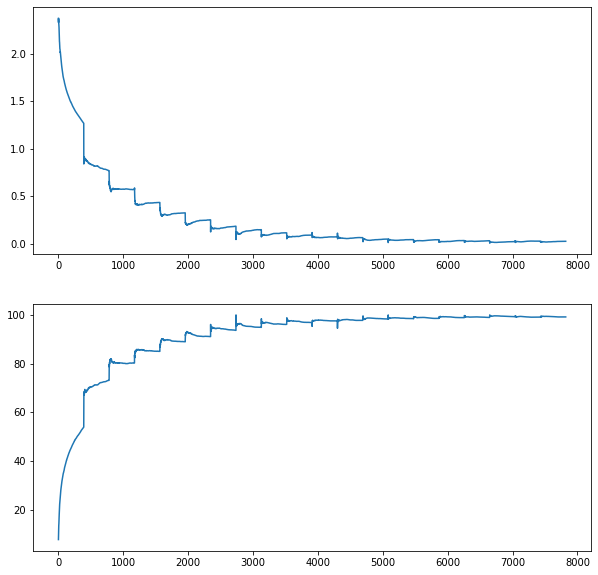

In [19]:
plotloss = []
plotauc = []
for epoch in range(20):  # 指定训练一共要循环几个epoch
    net.train()
    sum_loss = 0.0
    correct = 0.0
    total = 0.0
    
    # 这里我们遇到了第一步中出现的trailoader，代码传入数据，enumerate是python的内置函数，既获得索引也获得数据
    for i, (images,labels) in enumerate(trainloader):
        # data是从enumerate返回的data，包含数据和标签信息，分别赋值给inputs和labels
        # data的结构是：[4x3x32x32的张量,长度4的张量],4是batch_size的数值
 
        # 把input数据从tensor转为variable，variable才拥有梯度grad,输入模型训练都要转成Variable        
        if torch.cuda.is_available():
            images=Variable(images).cuda()
            labels=Variable(labels).cuda()
        else:
            images=Variable(images) 
            labels=Variable(labels)

        # 将参数的grad值初始化为
        optimizer.zero_grad()                
 
        # forward + backward + optimize      
        outputs = net(images)
        # 将output和labels使用叉熵计算损失
        loss = criterion(outputs, labels)
        # 反向传播
        loss.backward()
        # 用SGD更新参数
        optimizer.step()
        
        # loss.item()转换为numpy
        # loss本身为Variable类型，所以要使用loss.data[0]获取其Tensor，因为其为标量，所以取0
        sum_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)          # 更新测试图片的数量
        correct += (predicted == labels).sum() # 更新正确分类的图片的数量
#         if i % 200 == 199:
        print('[epoch:%d, iter:%d] Loss: %.03f | Acc: %.3f%% ' 
              % (epoch + 1, (i + 1 + epoch * len(trainloader)), sum_loss / (i + 1), 100. * correct / total))
        plotloss.append(sum_loss / (i + 1))
        plotauc.append(100. * correct / total)
        
print('Finished Training')
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(plotloss)
plt.subplot(2,1,2)
plt.plot(plotauc)

### 7. 测试

In [20]:
# 创建一个python迭代器，读入的是我们第一步里面就已经加载好的testloader
dataiter = iter(testloader)
# 返回一个batch_size的图片，根据第一步的设置，应该是4张（更改过后是10）
images, labels = dataiter.next()

In [21]:
images.size()

torch.Size([128, 3, 32, 32])

In [22]:
labels

tensor([3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6, 7, 0, 4, 9,
        5, 2, 4, 0, 9, 6, 6, 5, 4, 5, 9, 2, 4, 1, 9, 5, 4, 6, 5, 6, 0, 9, 3, 9,
        7, 6, 9, 8, 0, 3, 8, 8, 7, 7, 4, 6, 7, 3, 6, 3, 6, 2, 1, 2, 3, 7, 2, 6,
        8, 8, 0, 2, 9, 3, 3, 8, 8, 1, 1, 7, 2, 5, 2, 7, 8, 9, 0, 3, 8, 6, 4, 6,
        6, 0, 0, 7, 4, 5, 6, 3, 1, 1, 3, 6, 8, 7, 4, 0, 6, 2, 1, 3, 0, 4, 2, 7,
        8, 3, 1, 2, 8, 0, 8, 3])

In [23]:
# # np.transpose( xxx,  (2, 0, 1))   # 将 C x H x W 转化为 H x W x C
# # 展示这四张图片
# fig = plt.figure(figsize=(15, 10))
# for i in range(10):
#     ax = fig.add_subplot(2,5,i+1)
#     img_skimage = np.transpose(images[i].numpy(), (1,2,0))
#     ax.imshow(img_skimage)
# plt.show()
# print(labels)

程序中的 `torch.max(outputs.data, 1)` ，返回一个tuple (元组)

而这里很明显，这个返回的元组的第一个元素是image data，即是最大的 值，第二个元素是label， 即是最大的值 的 索引！我们只需要label（最大值的索引），所以就会有` _ `,predicted这样的赋值语句，表示忽略第一个返回值，把它赋值给` _`， 就是舍弃它的意思；

In [24]:
correct = 0   # 定义预测正确的图片数，初始化为0
total = 0     # 总共参与测试的图片数，也初始化为0
for data in testloader:  # 循环每一个batch
    images, labels = data
    images=Variable(images).cuda()
    labels=Variable(labels).cuda()
    net.eval()  # 把模型转为test模式
    outputs = net(images)  # 输入网络进行测试
    
    # outputs.data是一个4x10张量，将每一行的最大的那一列的值和序号各自组成一个一维张量返回，第一个是值的张量，第二个是序号的张量。
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)          # 更新测试图片的数量
    correct += (predicted == labels).sum() # 更新正确分类的图片的数量

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))
 

Accuracy of the network on the 10000 test images: 83 %


In [25]:
 # 定义2个存储每类中测试正确的个数的 列表，初始化为0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))  
for data in testloader:
    images, labels = data
    images=Variable(images).cuda()
    labels=Variable(labels).cuda()
    outputs = net(images)

    _, predicted = torch.max(outputs.data, 1)
    #4组(batch_size)数据中，输出于label相同的，标记为1，否则为0
    c = (predicted == labels).squeeze()
    for i in range(16):      # 因为每个batch都有4张图片，所以还需要一个4的小循环
        label = labels[i]   # 对各个类的进行各自累加
        class_correct[label] += c[i]
        class_total[label] += 1
 
 
for i in range(10):
    print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 83 %
Accuracy of   car : 93 %
Accuracy of  bird : 81 %
Accuracy of   cat : 60 %
Accuracy of  deer : 81 %
Accuracy of   dog : 74 %
Accuracy of  frog : 87 %
Accuracy of horse : 91 %
Accuracy of  ship : 90 %
Accuracy of truck : 92 %


### 8. 保存模型

In [26]:
torch.save(net, 'D:/CIFAR-10/model/Mynet.pth')

D:\Anaconda3\lib\site-packages\torch\serialization.py:360: UserWarning: Couldn't retrieve source code for container of type Mynet. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


### 9. 预测

In [27]:
import torch
from PIL import Image
from torch.autograd import Variable
import torch.nn.functional as F
from torchvision import datasets, transforms
import numpy as np
 
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = torch.load('D:/CIFAR-10/model/Mynet.pth')  # 加载模型
model = model.to(device)
model.eval()  # 把模型转为test模式

# 读取要预测的图片
img = Image.open("D:/CIFAR-10/truck.jpg").convert('RGB') # 读取图像

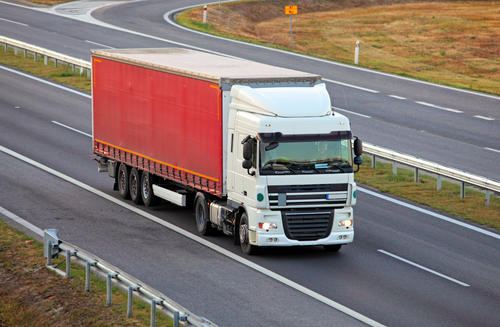

In [28]:
img

In [29]:
trans = transforms.Compose([transforms.Scale((32,32)),
                            transforms.ToTensor(),
                            transforms.Normalize(mean=(0.5, 0.5, 0.5), 
                                                 std=(0.5, 0.5, 0.5)),
                           ])
 
img = trans(img)
img = img.to(device)
# 图片扩展多一维,因为输入到保存的模型中是4维的[batch_size,通道,长，宽]，而普通图片只有三维，[通道,长，宽]
img = img.unsqueeze(0)  
    # 扩展后，为[1，1，28，28]
output = model(img)
prob = F.softmax(output,dim=1) #prob是10个分类的概率
print("概率",prob)
value, predicted = torch.max(output.data, 1)
print("类别",predicted.item())
print(value)
pred_class = classes[predicted.item()]
print("分类",pred_class)
 
 
 
    # prob = F.softmax(output, dim=1)
    # prob = Variable(prob)
    # prob = prob.cpu().numpy()  # 用GPU的数据训练的模型保存的参数都是gpu形式的，要显示则先要转回cpu，再转回numpy模式
    # print(prob)  # prob是10个分类的概率
    # pred = np.argmax(prob)  # 选出概率最大的一个
    # # print(pred)
    # # print(pred.item())
    # pred_class = classes[pred]
    # print(pred_class)

概率 tensor([[6.3152e-06, 1.4987e-04, 5.5924e-08, 7.3300e-08, 4.0838e-09, 5.7835e-08,
         2.7717e-08, 9.8018e-09, 1.2110e-05, 9.9983e-01]], device='cuda:0',
       grad_fn=<SoftmaxBackward>)
类别 9
tensor([13.9431], device='cuda:0')
分类 truck


D:\Anaconda3\lib\site-packages\torchvision\transforms\transforms.py:219: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  warnings.warn("The use of the transforms.Scale transform is deprecated, " +
